In [21]:
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 0311

In [22]:
# keras에서 데이터를 불러올 때는 묶어서 들고와야함
(train_x, train_y),(test_x, test_y) = keras.datasets.fashion_mnist.load_data()

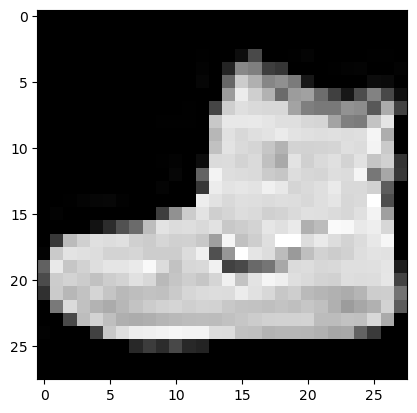

In [23]:
plt.imshow(train_x[0], cmap='gray')
plt.show()

In [24]:
train_x.shape,train_y.shape,test_x.shape,test_x.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000, 28, 28))

In [20]:
# 3차원을 2차원으로 변환
train_scaled = train_x.reshape(60000,28*28) #train_x.reshape(60000,784)
test_scaled = test_x.reshape(10000,784)

### 이미지 데이터를 랜덤포레스트로 학습

In [29]:
rf = RandomForestClassifier()
rf.fit(train_scaled, train_y)

RandomForestClassifier()

In [31]:
rf.score(test_scaled, test_y)
# 87%의 확률로 맞춘다

0.8775

### 이미지 데이터를 신경망 기반으로 학습

![인공신경망](https://website-assets-fd.freshworks.com/attachments/ckwor1dcs00ddjxfn6v4uygfu-deep-learning-1.one-half.jpg)

In [52]:
# tensorflow같은 경우는 keras.Sequential()를 안해주면, 
# 만들어진 곳에 기존의 것에 추가되는 방안으로 연결되는 것
# 그래서 새로 만들 때는 keras.Sequential()를 해줘야 함

In [35]:
# 하나의 값을 가진 튜플 만들기
# 콤마! 사용
a = (5,)
a

(5,)

#### 인공신경망 (기본)

In [42]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

# 노드를 추가하겠다.
# 출력 가능한 값(패션 수)이 10개
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(784, ) ))

In [45]:
# 7850개의 가중치를 학습해야 함
# 784 * 10 + 10 (bias)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# 어떤 식으로 학습할 것인지 
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [47]:
hist = model.fit(train_scaled, train_y, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 20.7195 - accuracy: 0.7385
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 16.7322 - accuracy: 0.7818
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 15.8273 - accuracy: 0.7894
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 15.5129 - accuracy: 0.7927
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 15.2739 - accuracy: 0.7962
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 15.0728 - accuracy: 0.7965
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 15.2106 - accuracy: 0.7991
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 14.9794 - accuracy: 0.8013
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 14.8515 - accuracy: 0.8014
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - lo

In [48]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 16.4268 - accuracy: 0.8116


[16.42684555053711, 0.8116000294685364]

#### 인공신경망 (데이터 표준화)

In [49]:
# 이미지 데이터의 경우 픽셀 값이 255로 정해져있음
# 그래서 minmax 처럼 고냥 255를 나눠주면 되는 것
train_scaled = train_x.reshape(60000,28*28) /255
test_scaled = test_x.reshape(10000,784) /255

In [50]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

# 노드를 추가하겠다.
# 출력 가능한 값(패션 수)이 10개
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(784, ) ))

# 어떤 식으로 학습할 것인지 
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

hist = model.fit(train_scaled, train_y, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5800 - accuracy: 0.8051
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4649 - accuracy: 0.8422
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4445 - accuracy: 0.8489
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4321 - accuracy: 0.8524
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4265 - accuracy: 0.8555
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4214 - accuracy: 0.8577
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4172 - accuracy: 0.8600
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4142 - accuracy: 0.8610
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4115 - accuracy: 0.8616
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.410

In [51]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.8383


[0.5104861259460449, 0.8382999897003174]

#### 딥러닝 (인공신경망에 은닉층 1개 추가) 
은닉층을 하나만 넣어도 딥러닝이라고 하며, 너무 많은 은닉층은 과적합을 유발해서 좋지 않음

- 최적의 은닉층?     
아직 정해진 것은 없음(공식이 없음) 그래서 사람이 알아서 설정해줘야 하는거!)

In [54]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

# 784개에서 300개의 은닉층으로 가라
# 은닉층으로 가는 노드 개수
model.add(keras.layers.Dense(300,input_shape=(784, ) )) # activation은 다 작용하고 있지만, default로 작용되는 것
model.add(keras.layers.Dense(10, activation = 'softmax')) # 은닉층 개수가 300이라고 주어졌기 때문에 굳이 input_shape를 적어 줄 필요없음

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# 어떤 식으로 학습할 것인지 
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

hist = model.fit(train_scaled, train_y, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3903 - accuracy: 0.8654
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3890 - accuracy: 0.8656
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3873 - accuracy: 0.8653
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3882 - accuracy: 0.8651
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3887 - accuracy: 0.8648
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3877 - accuracy: 0.8653
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3882 - accuracy: 0.8653
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3863 - accuracy: 0.8658
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3869 - accuracy: 0.8644
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3807 - accuracy: 0.8682
Epoch 80/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3812 - accuracy: 0.8687
Epoch 81/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3796 - accuracy: 0.8676
Epoch 82/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8672
Epoch 83/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3804 - accuracy: 0.8667
Epoch 84/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3811 - accuracy: 0.8667
Epoch 85/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3796 - accuracy: 0.8662
Epoch 86/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8672
Epoch 87/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3802 - accuracy: 0.8672
Epoch 88/100
1875/1875 [==============================] - 3s 2ms/step - loss:

In [58]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.5383 - accuracy: 0.8194


[0.5383378863334656, 0.8194000124931335]

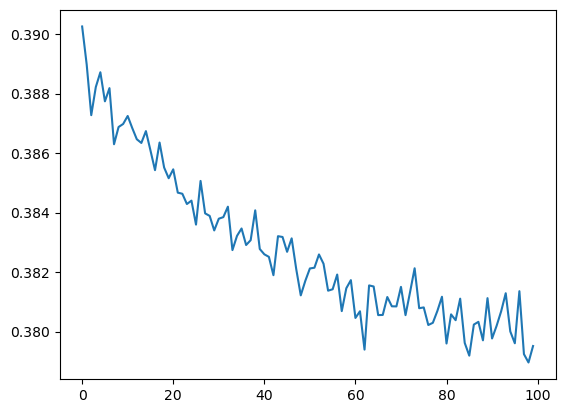

In [59]:
plt.plot(hist.history['loss'])

#### 딥러닝 (검증용 데이터 추가 - val loss)

In [60]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

# 784개에서 300개의 은닉층으로 가라
# 은닉층으로 가는 노드 개수
model.add(keras.layers.Dense(300,input_shape=(784, ) )) # activation은 다 작용하고 있지만, default로 작용되는 것
model.add(keras.layers.Dense(10, activation = 'softmax')) # 은닉층 개수가 300이라고 주어졌기 때문에 굳이 input_shape를 적어 줄 필요없음

# 어떤 식으로 학습할 것인지 
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

# 학습이 끝날 때마다, 검증용 데이터로 쪽지시험치는 것처럼 확인 하는 것
hist = model.fit(train_scaled, train_y, epochs = 100,
                validation_data=(test_scaled, test_y))

# val_loss가 줄어드는지 확인해야함. 검증용 데이터가 줄어드는 방향으로 가야함

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6020 - accuracy: 0.7966 - val_loss: 0.5204 - val_accuracy: 0.8175
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4791 - accuracy: 0.8326 - val_loss: 0.5109 - val_accuracy: 0.8183
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4573 - accuracy: 0.8401 - val_loss: 0.4949 - val_accuracy: 0.8261
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4467 - accuracy: 0.8449 - val_loss: 0.4895 - val_accuracy: 0.8253
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4381 - accuracy: 0.8486 - val_loss: 0.4655 - val_accuracy: 0.8374
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4310 - accuracy: 0.8496 - val_loss: 0.4907 - val_accuracy: 0.8277
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4263 - accuracy: 0.8509 - val_loss: 0.4791 - val_ac

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3858 - accuracy: 0.8650 - val_loss: 0.4836 - val_accuracy: 0.8371
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3854 - accuracy: 0.8657 - val_loss: 0.5162 - val_accuracy: 0.8219
Epoch 59/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3867 - accuracy: 0.8643 - val_loss: 0.4900 - val_accuracy: 0.8331
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3858 - accuracy: 0.8652 - val_loss: 0.4858 - val_accuracy: 0.8359
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3855 - accuracy: 0.8660 - val_loss: 0.4867 - val_accuracy: 0.8388
Epoch 62/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3855 - accuracy: 0.8663 - val_loss: 0.4867 - val_accuracy: 0.8319
Epoch 63/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3857 - accuracy: 0.8660 - val_loss: 0.4715 - val_accuracy

In [61]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.8409


[0.4880424737930298, 0.8409000039100647]

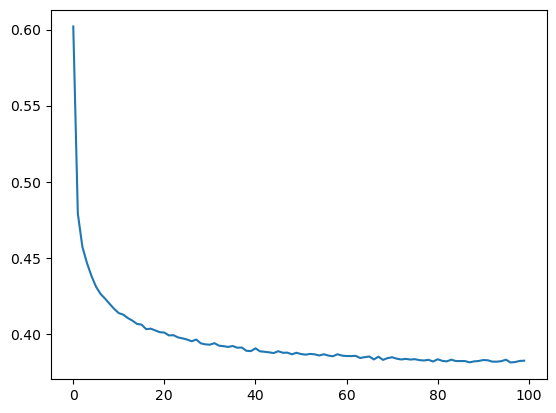

In [62]:
plt.plot(hist.history['loss'])

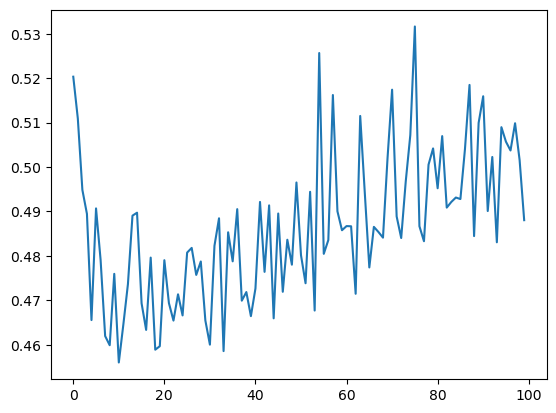

In [63]:
plt.plot(hist.history['val_loss'])

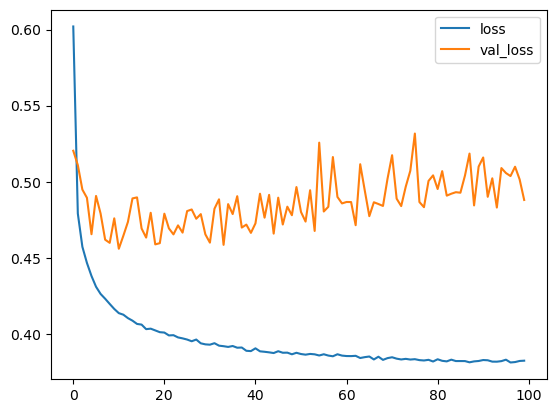

In [64]:
# loss는 줄어들고 있지만, val_loss 가 증가하는 모습으로 보았을 때
# 과적합이 되고 있다는 것을 확인할 수 있음
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#### 딥러닝 (Dropout)으로 과적합 방지

컴퓨터는 한 번에 32개의 데이터를 학습할 수 있어서,             
현재 6만개의 데이터이지만, epoch에서 봤을 때 1875임을 볼 수 있음               
60000 = 1875*32

In [65]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

model.add(keras.layers.Dense(300,input_shape=(784, ) )) # activation은 다 작용하고 있지만, default로 작용되는 것

#노드 300개 중 30%의 선이 끊김 # 주로 10~40% 를 줌 
# 너무 꼬불거리는 선을 억눌러줌 (과적합 방지)
# 0.5 이상인 경우 더 안좋다는 논문 결과 있음
model.add(keras.layers.Dropout(0.3)) 

model.add(keras.layers.Dense(10, activation = 'softmax')) # 은닉층 개수가 300이라고 주어졌기 때문에 굳이 input_shape를 적어 줄 필요없음

# 어떤 식으로 학습할 것인지 
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

# 학습이 끝날 때마다, 검증용 데이터로 쪽지시험치는 것처럼 확인 하는 것
hist = model.fit(train_scaled, train_y, epochs = 50,
                validation_data=(test_scaled, test_y))

# val_loss가 줄어드는지 확인해야함. 검증용 데이터가 줄어드는 방향으로 가야함

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6460 - accuracy: 0.7851 - val_loss: 0.5312 - val_accuracy: 0.8200
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5135 - accuracy: 0.8242 - val_loss: 0.4959 - val_accuracy: 0.8359
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4903 - accuracy: 0.8326 - val_loss: 0.4957 - val_accuracy: 0.8334
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4775 - accuracy: 0.8358 - val_loss: 0.4629 - val_accuracy: 0.8426
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.8389 - val_loss: 0.4911 - val_accuracy: 0.8320
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4677 - accuracy: 0.8422 - val_loss: 0.4890 - val_accuracy: 0.8344
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4617 - accuracy: 0.8401 - val_loss: 0.5365 - val_accuracy:

In [66]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.5207 - accuracy: 0.8254


[0.5207030177116394, 0.8253999948501587]

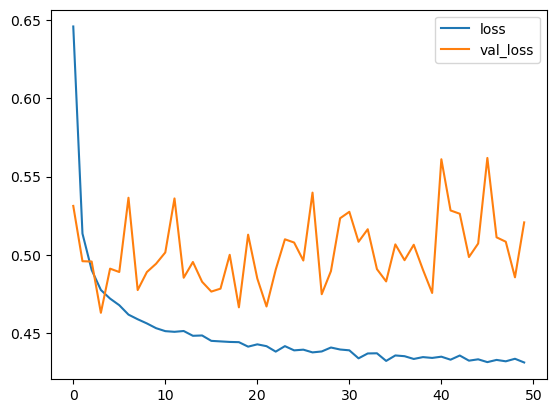

In [67]:
# loss는 줄어들고 있지만, val_loss 가 증가하는 모습으로 보았을 때
# 과적합이 되고 있다는 것을 확인할 수 있음
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#### 딥러닝 (batch_size 조절)

In [68]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

model.add(keras.layers.Dense(300,input_shape=(784, ) )) # activation은 다 작용하고 있지만, default로 작용되는 것

#노드 300개 중 30%의 선이 끊김 # 주로 10~40% 를 줌 
# 너무 꼬불거리는 선을 억눌러줌 (과적합 방지)
# 0.5 이상인 경우 더 안좋다는 논문 결과 있음
model.add(keras.layers.Dropout(0.3)) 

model.add(keras.layers.Dense(10, activation = 'softmax')) # 은닉층 개수가 300이라고 주어졌기 때문에 굳이 input_shape를 적어 줄 필요없음

# 어떤 식으로 학습할 것인지 
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

# 학습이 끝날 때마다, 검증용 데이터로 쪽지시험치는 것처럼 확인 하는 것
# 32개로 학습했지만, 성능 문제로 터질 수 있기 때문에, 
# batchsize를 줄일 수 있음
hist = model.fit(train_scaled, train_y, epochs = 50,
                validation_data=(test_scaled, test_y),
                batch_size = 16)

# val_loss가 줄어드는지 확인해야함. 검증용 데이터가 줄어드는 방향으로 가야함

Epoch 1/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.6546 - accuracy: 0.7877 - val_loss: 0.5135 - val_accuracy: 0.8327
Epoch 2/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5377 - accuracy: 0.8216 - val_loss: 0.5509 - val_accuracy: 0.8045
Epoch 3/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5195 - accuracy: 0.8279 - val_loss: 0.5290 - val_accuracy: 0.8208
Epoch 4/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5062 - accuracy: 0.8305 - val_loss: 0.5071 - val_accuracy: 0.8315
Epoch 5/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5030 - accuracy: 0.8331 - val_loss: 0.5428 - val_accuracy: 0.8136
Epoch 6/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4990 - accuracy: 0.8335 - val_loss: 0.5148 - val_accuracy: 0.8295
Epoch 7/50
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4977 - accuracy: 0.8354 - val_loss: 0.6147 - val_accuracy:

In [69]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.5531 - accuracy: 0.8204


[0.5531039834022522, 0.8203999996185303]

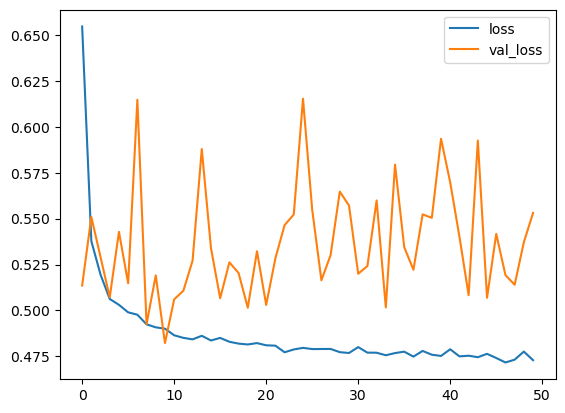

In [70]:
# loss는 줄어들고 있지만, val_loss 가 증가하는 모습으로 보았을 때
# 과적합이 되고 있다는 것을 확인할 수 있음
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [71]:
# 예측값

In [72]:
a = test_scaled[0].reshape(1,784)
a.shape

(1, 784)

In [73]:
model.predict(a)

1/1 [==============================] - 0s 76ms/step


array([[1.6998665e-05, 1.9809323e-07, 2.6169801e-04, 1.1562211e-04,
        3.5771365e-05, 1.2883404e-01, 3.5847467e-04, 8.4005162e-02,
        2.1513332e-02, 7.6485866e-01]], dtype=float32)

#### 딥러닝(표준화 + Dropout + 은닉층 2개)

In [86]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

model.add(keras.layers.Dense(300,input_shape=(784, ) )) # activation은 다 작용하고 있지만, default로 작용되는 것

#노드 300개 중 30%의 선이 끊김 # 주로 10~40% 를 줌 
# 너무 꼬불거리는 선을 억눌러줌 (과적합 방지)
# 0.5 이상인 경우 더 안좋다는 논문 결과 있음
model.add(keras.layers.Dropout(0.4)) 
model.add(keras.layers.Dense(150))
model.add(keras.layers.Dropout(0.4)) 
model.add(keras.layers.Dense(10, activation = 'softmax')) # 은닉층 개수가 300이라고 주어졌기 때문에 굳이 input_shape를 적어 줄 필요없음

# 어떤 식으로 학습할 것인지 
model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

# 학습이 끝날 때마다, 검증용 데이터로 쪽지시험치는 것처럼 확인 하는 것
# 32개로 학습했지만, 성능 문제로 터질 수 있기 때문에, 
# batchsize를 줄일 수 있음
hist = model.fit(train_scaled, train_y, epochs = 50,
                validation_data=(test_scaled, test_y))

# val_loss가 줄어드는지 확인해야함. 검증용 데이터가 줄어드는 방향으로 가야함

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7776 - accuracy: 0.7521 - val_loss: 0.5570 - val_accuracy: 0.8163
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5854 - accuracy: 0.8043 - val_loss: 0.5159 - val_accuracy: 0.8200
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8166 - val_loss: 0.5234 - val_accuracy: 0.8230
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5372 - accuracy: 0.8194 - val_loss: 0.5358 - val_accuracy: 0.8204
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5292 - accuracy: 0.8219 - val_loss: 0.4936 - val_accuracy: 0.8305
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5273 - accuracy: 0.8220 - val_loss: 0.4993 - val_accuracy: 0.8331
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5229 - accuracy: 0.8244 - val_loss: 0.5244 - val_accuracy:

In [87]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.8340


[0.486773282289505, 0.8339999914169312]

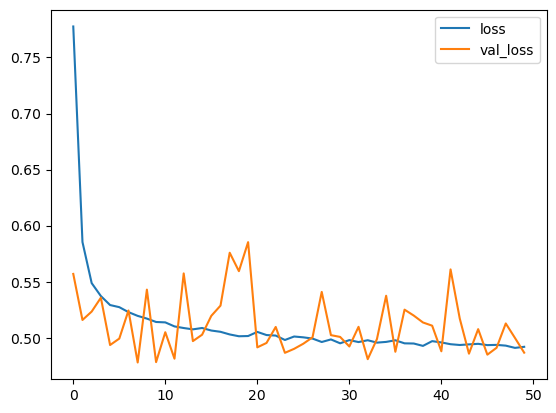

In [88]:
# loss는 줄어들고 있지만, val_loss 가 증가하는 모습으로 보았을 때
# 과적합이 되고 있다는 것을 확인할 수 있음
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#### 딥러닝 (은닉층 1개, EarlyStopping - epoch 멈춤)

In [89]:
# 인공신경망을 설계하기 위한 도화지 Sequential
model = keras.Sequential()

model.add(keras.layers.Dense(300,input_shape=(784, ),
                            activation='sigmoid')) #모두 0~1 사이의 값으로 조정되서 통과될거임(300개가 생김)

model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax')) 

model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

# 오차값이 내려가다가 올라가게 될 텐데, (학습이 많이 되면)
# 가장 오차가 낮은 지점에서 count를 세고, 5번을 해도 모델이 안좋아지면,
# 5번에서 그만 두겠다. (그런데 이건 5번 과적합이 적용되었다는 의미)
# 그래서 restore_best_weights = True를 통해서 5번 전의 가장 낮은 지점으로 돌아갈 수 있음
es = keras.callbacks.EarlyStopping(patience=5,
                                  restore_best_weights=True)


# callback은 validation 기준으로 진행되는 것
#  그래서 validation_data를 안 넣으면 사용 불가능
hist = model.fit(train_scaled, train_y, epochs = 1000,
                validation_data=(test_scaled, test_y),
                callbacks = [es])

# val_loss가 줄어드는지 확인해야함. 검증용 데이터가 줄어드는 방향으로 가야함

Epoch 1/1000
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5740 - accuracy: 0.7919 - val_loss: 0.4652 - val_accuracy: 0.8306
Epoch 2/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4359 - accuracy: 0.8429 - val_loss: 0.4212 - val_accuracy: 0.8510
Epoch 3/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4044 - accuracy: 0.8554 - val_loss: 0.4000 - val_accuracy: 0.8629
Epoch 4/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3818 - accuracy: 0.8629 - val_loss: 0.3887 - val_accuracy: 0.8643
Epoch 5/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3675 - accuracy: 0.8696 - val_loss: 0.3952 - val_accuracy: 0.8648
Epoch 6/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3593 - accuracy: 0.8715 - val_loss: 0.3745 - val_accuracy: 0.8678
Epoch 7/1000
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3509 - accuracy: 0.8767 - val_loss: 0.3704 -

In [92]:
model.evaluate(test_scaled, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8848


[0.3490973114967346, 0.8848000168800354]

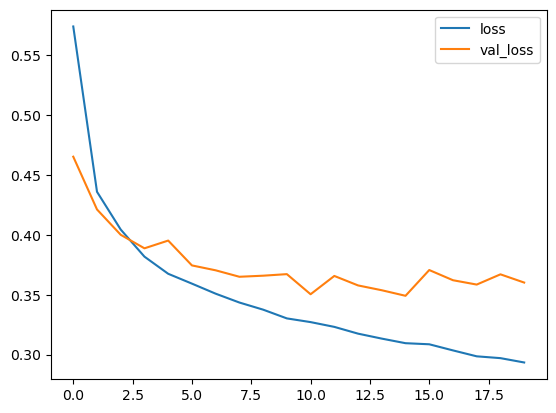

In [91]:
# loss는 줄어들고 있지만, val_loss 가 증가하는 모습으로 보았을 때
# 과적합이 되고 있다는 것을 확인할 수 있음
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#### *오차제곱합

In [81]:
import numpy as np
#y = 2
# y는 2를 이해하기 힘들어서 
y = np.array([0,0,1])
t = np.array([0.1,0.6,0.3])

sum((y-t)**2)

0.8599999999999999

In [82]:
import numpy as np
#y = 2
y = np.array([0,0,1])
t = np.array([0.1,0.3,0.6])

sum((y-t)**2)

0.26

#### loss= 'sparse_categorical_crossentropy' 설명


log함수를 적용해서 오차를 계산하기 때문에, 초반 부분이 빠르게 학습이 되고, 천천히 수정 가능
수렴이 더 빨라짐 (학습이 빨라짐)


- categorical_crossentropy 로 사용해도 되는데, 그러면 정답지를 원핫인코딩을 진행했어야 했음
- 그래서 sparse를 해주는게 좋음

In [83]:
def cross_entropy_error(y,t):
    return -np.sum(t*np.log(y+1e-7)) # 무한대로 가지 못하게 아주 작은 값을 더해준거 1e-7

In [84]:
y = np.array([0,0,1])
t = np.array([0.1,0.3,0.6])
cross_entropy_error(y,t)

6.447238200383332

In [85]:
y = np.array([0,0,1])
t = np.array([0.1,0.6,0.3])
cross_entropy_error(y,t)

11.282666925670826

### pima 연습

In [94]:
data = pd.read_csv('실습 파일/pima_indians.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:,:-1].to_numpy()
y = data['Class']

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2)

ss = StandardScaler()
train_scaled =ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

train_x, val_x, train_y, val_y = train_test_split(train_scaled, train_y, test_size = 0.25)

In [104]:
train_x.shape

(491, 8)

In [106]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Dense(16,input_shape=(8, ),
                            activation='sigmoid')) #모두 0~1 사이의 값으로 조정되서 통과될거임(300개가 생김)

model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(4)) 

model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation = 'softmax')) 

model.compile(loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

es = keras.callbacks.EarlyStopping(patience=5,
                                  restore_best_weights=True)


hist = model.fit(train_x, train_y, epochs = 1000,
                validation_data=(val_x, val_y),
                callbacks = [es])

Epoch 1/1000
16/16 [==============================] - 1s 16ms/step - loss: 1.6445 - accuracy: 0.3605 - val_loss: 1.2765 - val_accuracy: 0.3984
Epoch 2/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.3423 - accuracy: 0.3768 - val_loss: 1.0547 - val_accuracy: 0.3984
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 1.1069 - accuracy: 0.4175 - val_loss: 0.8939 - val_accuracy: 0.3984
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.9605 - accuracy: 0.3890 - val_loss: 0.7672 - val_accuracy: 0.3984
Epoch 5/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.8018 - accuracy: 0.4949 - val_loss: 0.6902 - val_accuracy: 0.4959
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.7147 - accuracy: 0.5723 - val_loss: 0.6498 - val_accuracy: 0.7073
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.5784 - val_loss: 0.6332 - val_accuracy: 0.6585
Epoch

In [107]:
model.evaluate(test_scaled, test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8312


[0.4179511070251465, 0.8311688303947449]

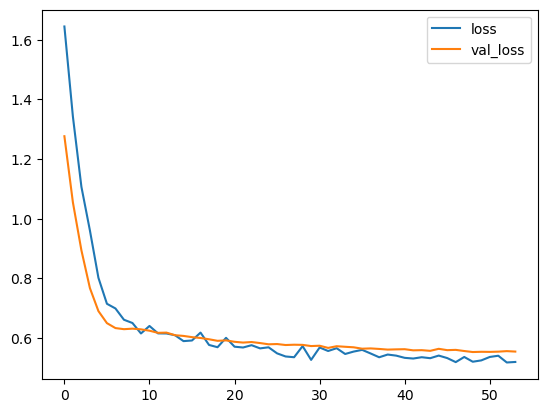

In [108]:
# loss는 줄어들고 있지만, val_loss 가 증가하는 모습으로 보았을 때
# 과적합이 되고 있다는 것을 확인할 수 있음
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [121]:
from sklearn.metrics import classification_report

# 딥러닝은 선형회귀라서 predict_proba형식으로 항상 나옴
# 그래서 argmax로 0과 1을 나타나게 해서 하는 것
pred = model.predict(test_scaled)
pred_ls = np.argmax(pred,axis=1)

print(classification_report(test_y,pred_ls))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       105
           1       0.78      0.65      0.71        49

    accuracy                           0.83       154
   macro avg       0.82      0.78      0.80       154
weighted avg       0.83      0.83      0.83       154



In [124]:
np.argmax(pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)